In [1]:
import pandas as pd
flights = pd.read_csv('modules/samples/flights_sample.csv',sep=';')
import numpy as np
from sklearn.model_selection import train_test_split

flights.columns

flights.isnull().sum().sort_values(ascending=False)[:10].index

flights['cancelled'].value_counts()

y = flights['arr_delay']
X = flights[['Unnamed: 0', 'Unnamed: 0.1', 'fl_date', 'mkt_unique_carrier',
       'branded_code_share', 'mkt_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time',
       'arr_time', 'cancelled', 'cancellation_code', 'diverted',
       'dup', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights',
       'distance', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay', 'first_dep_time',
       'total_add_gtime', 'longest_add_gtime', 'no_name']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

null = ['no_name', 'total_add_gtime', 'first_dep_time', 'longest_add_gtime',
       'cancellation_code', 'late_aircraft_delay', 'security_delay',
       'nas_delay', 'weather_delay', 'carrier_delay']

repeat_cols = ['origin_airport_id','origin_city_name', 'dest_airport_id','dest_city_name','op_carrier_fl_num',
              'mkt_unique_carrier','branded_code_share','op_unique_carrier','tail_num']


logical_drop = ['Unnamed: 0', 'Unnamed: 0.1','wheels_off', 'wheels_on','cancelled','diverted','dup',
               'flights',
               'origin','dest','mkt_carrier_fl_num','diverted','cancelled'
]

col_to_agg = ['dep_time','arr_time','actual_elapsed_time', 'crs_dep_time','taxi_out','taxi_in',
             'air_time']

In [2]:
X_train.drop(labels=null, axis=1, inplace=True)
X_train.drop(labels=repeat_cols, axis=1, inplace=True)
X_train.drop(labels=logical_drop, axis=1, inplace=True)


X_test.drop(labels=null, axis=1, inplace=True)
X_test.drop(labels=repeat_cols, axis=1, inplace=True)
X_test.drop(labels=logical_drop, axis=1, inplace=True)


for col in X_train.columns:
    if X_train[col].isnull().sum() > 70000:
        X_train.drop(labels=col, axis=1, inplace=True)
        
for col in X_train.columns:
    if X_train[col].isnull().sum() < 70000:
        if X_train[col].dtype == 'float64':
            X_train[col].fillna(X_train[col].mean(), inplace=True)
        else:
            X_train[col].fillna(X_train[col].mode(), inplace=True)        

##

for col in X_test.columns:
    if X_test[col].isnull().sum() > 70000:
        X_test.drop(labels=col, axis=1, inplace=True)
        
for col in X_test.columns:
    if X_test[col].isnull().sum() < 70000:
        if X_test[col].dtype == 'float64':
            X_test[col].fillna(X_test[col].mean(), inplace=True)
        else:
            X_test[col].fillna(X_test[col].mode(), inplace=True)     

X_train.loc[:,'fl_date']= pd.to_datetime(X_train['fl_date']).dt.strftime('%m').astype('int64')

X_test.loc[:,'fl_date']= pd.to_datetime(X_test['fl_date']).dt.strftime('%m').astype('int64')

X_train = pd.get_dummies(X_train)

X_test = pd.get_dummies(X_test)

for col in col_to_agg:
    for i in range(1,13):
        X_train.loc[X_train['fl_date']==i, col]= X_train.groupby(by='fl_date').mean()[col][i]

for col in col_to_agg:
    for i in range(1,13):
        X_test.loc[X_test['fl_date']==i, col]= X_test.groupby(by='fl_date').mean()[col][i]

y_train = y_train.fillna(y_train.mean())

y_test = y_test.fillna(y_test.mean())

C:\Users\yeman_s1h20q2\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\yeman_s1h20q2\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\yeman_s1h20q2\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()


reg.fit(X_train, y_train)

reg.score(X_train, y_train)

0.9214697318509218

In [39]:
reg.score(X_test, y_test)

0.9239307574338138

---

test lin reg on test data

In [6]:
# y_test_pred

In [7]:
y_test

29384   -19.0
59433    -8.0
97806    -3.0
592     -16.0
20157    12.0
         ... 
42621    17.0
64478    99.0
92040     2.0
29504    -1.0
30632    35.0
Name: arr_delay, Length: 20000, dtype: float64

In [8]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 4.265e+04
Date:                Mon, 08 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:32:53   Log-Likelihood:            -3.2291e+05
No. Observations:               79996   AIC:                         6.459e+05
Df Residuals:                   79973   BIC:                         6.461e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  36.8116    

---
# Random Forest Reg


In [10]:
#Import Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

#Create a Gaussian Classifier
clf=RandomForestRegressor()

In [11]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [22]:
ytp =regr.predict(X_test)

In [23]:
from sklearn.metrics import r2_score

r2_score(y_test, ytp)

0.8064071580123738

---
# XGB REG

In [31]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

data_dmatrix = xgb.DMatrix(data=X,label=y)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [32]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[20:55:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 41.068616


In [43]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)




[21:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[21:42:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [44]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,44.777920,0.336629,44.806333,0.662741
1,44.689732,0.351472,44.732728,0.649775
2,44.608630,0.326110,44.668616,0.668556
3,43.288389,2.059456,43.292872,1.449203
4,42.119167,3.652043,42.092171,3.058178


In [47]:
import matplotlib.pyplot as plt

(array([1.8712e+04, 1.0800e+03, 1.3800e+02, 4.2000e+01, 8.0000e+00,
        4.0000e+00, 5.0000e+00, 1.0000e+00, 7.0000e+00, 3.0000e+00]),
 array([ -67. ,   59.9,  186.8,  313.7,  440.6,  567.5,  694.4,  821.3,
         948.2, 1075.1, 1202. ]),
 <BarContainer object of 10 artists>)

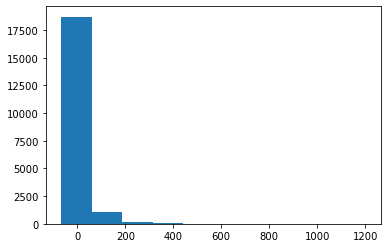

In [48]:
plt.hist(y_test)

(array([1.9152e+04, 1.4200e+02, 6.7200e+02, 1.0000e+00, 7.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01]),
 array([ -7.07817621,  68.43733934, 143.95285488, 219.46837042,
        294.98388597, 370.49940151, 446.01491705, 521.5304326 ,
        597.04594814, 672.56146368, 748.07697923]),
 <BarContainer object of 10 artists>)

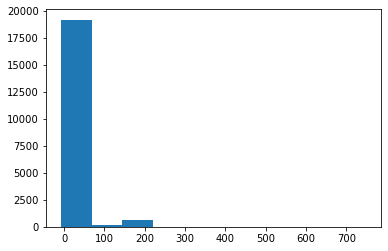

In [49]:
plt.hist(ytp)